<a href="https://colab.research.google.com/github/santiagoahl/Digit-recognition/blob/main/digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


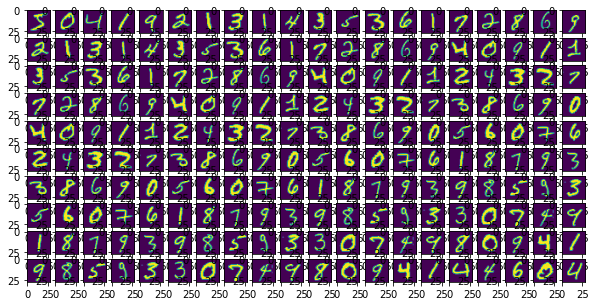

In [3]:
sample = train_data[0:200]
fig, ax = plt.subplots(nrows=10, ncols=20, figsize=(10, 5))
for x in range(10):
    for y in range(20):
        image = sample[x*5+y]
        ax[x, y].imshow(image)
fig.show()

In [4]:
def dist(x, y):
    d = np.linalg.norm(x-y, ord=784)
    return d

In [43]:
def upload_clusters(data, centroids):
    """
    Input: new centroids, points
    Output: upload the groups
    """
    k = len(centroids)
    clusters = [[] for w in range(k)]
    for i in range(len(data)):
        distances = [0 for s in range(k)]
        point = data[i]
        distances = [dist(point, centroids[j]) for j in range(k)]
        #print(distances[0])
        clust_index = np.argmin(distances)
        clusters[clust_index].append(i)
    #print('cl',clusters)
    return clusters

In [51]:
def upload_centroids(data, clusters):
    """
    Input: new clusters, points
    Output: upload the centroids
    """
    N = len(data)
    centroids = [np.zeros(784) for i in range(10)]
    # clusters [[1,2,3],[0,4],[5]]
    for i in range(10):
        clust_indices = clusters[i]
        points = [data[index] for index in clust_indices]
        centroids[i] = np.around(np.sum(points, axis=0)/N,8)
        #print(centroids[i])
    #print('ce',centroids,'\n')
    return centroids

In [41]:
da = [[1,2],[3,4],[4,0],[0,2]]
cl = [[3,1], [1,2]]
c = upload_centroids(da,cl)
len(c)

[0.75 1.5 ]
[1.75 1.  ]


2

In [59]:
def j_clust(data, centroids, clusters): 
    """
    Input: clusters, data, centroids
    Output: Error of the prediction
    """
    N = len(data)
    norms = []
    for i in range((len(clusters))):
        current_clust = clusters[i]
        current_centroid = centroids[i]
        candidates = []
        for j in range(len(current_clust)):
            current_point = data[current_clust[j]]
            norm = dist(current_point, current_centroid)
            candidates.append(norm)
        clust = [dist(point, centroids[j]) for j in range(k)]
        #print(distances[0])
        clust_index = np.argmin(distances)
        norms.append[]
    error = np.sum(norms,axis=0)/N
    return error

In [62]:
def k_means():
    n_iterations = 5
    N = len(train_data)
    k = 10
    data = train_data.reshape((60000, 28*28)).astype('float64')
    data = [data[i]/np.linalg.norm(data[i]) for i in range(N)]
    centroids = [np.random.rand(784) for i in range(k)]
    for iteration in range(n_iterations):
        clusters = upload_clusters(data, centroids)
        centroids = upload_centroids(data, clusters)
        error = j_clust(data, centroids, clusters)
        print('Iteration ',iteration)#, 'Loss: ', error)# 'Centroids', len(centroids[0]))#  # , 'Centroids', centroids, '\n Clusters: ', clusters[0][0:10])
    return centroids, clusters

In [64]:
centroids = k_means()

Iteration  0
Iteration  1
Iteration  2
Iteration  3
Iteration  4


In [ ]:
def determine_clust(centroids, )

In [17]:
print(np.sum([[1,2],[3,4],[8,0]],axis=0))

[12  6]


In [ ]:
centroids = [np.random.rand(3) for i in range(10)]
print(centroids)

In [ ]:
data = train_data.reshape((60000, 28*28)).astype('float64')
data = [data[0]/np.linalg.norm(data[0]) for i in range(20)]
len(data[0])

In [21]:
data = train_data.reshape((60000, 28*28)).astype('float64')
data = [data[i]/np.linalg.norm(data[i]) for i in range(len(data))]
len(data[0])

784